In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
import warnings
warnings.filterwarnings('ignore')

In [173]:
# 1. 데이터 로드

spam_df = pd.read_csv(
    "data/spambase2.csv"
    )
-spam_df

,make,address,all,3d,our,over,remove,internet,order,mail,...,freq_;,freq_(,freq_[,freq_!,freq_$,freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,-0.00,-0.64,-0.64,-0.0,-0.32,-0.00,-0.00,-0.00,-0.00,-0.00,...,-0.000,-0.000,-0.0,-0.778,-0.000,-0.000,-3.756,-61,-278,-1
1,-0.21,-0.28,-0.50,-0.0,-0.14,-0.28,-0.21,-0.07,-0.00,-0.94,...,-0.000,-0.132,-0.0,-0.372,-0.180,-0.048,-5.114,-101,-1028,-1
2,-0.06,-0.00,-0.71,-0.0,-1.23,-0.19,-0.19,-0.12,-0.64,-0.25,...,-0.010,-0.143,-0.0,-0.276,-0.184,-0.010,-9.821,-485,-2259,-1
3,-0.00,-0.00,-0.00,-0.0,-0.63,-0.00,-0.31,-0.63,-0.31,-0.63,...,-0.000,-0.137,-0.0,-0.137,-0.000,-0.000,-3.537,-40,-191,-1
4,-0.00,-0.00,-0.00,-0.0,-0.63,-0.00,-0.31,-0.63,-0.31,-0.63,...,-0.000,-0.135,-0.0,-0.135,-0.000,-0.000,-3.537,-40,-191,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,-0.31,-0.00,-0.62,-0.0,-0.00,-0.31,-0.00,-0.00,-0.00,-0.00,...,-0.000,-0.232,-0.0,-0.000,-0.000,-0.000,-1.142,-3,-88,0
4597,-0.00,-0.00,-0.00,-0.0,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,...,-0.000,-0.000,-0.0,-0.353,-0.000,-0.000,-1.555,-4,-14,0
4598,-0.30,-0.00,-0.30,-0.0,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,...,-0.102,-0.718,-0.0,-0.000,-0.000,-0.000,-1.404,-6,-118,0
4599,-0.96,-0.00,-0.00,-0.0,-0.32,-0.00,-0.00,-0.00,-0.00,-0.00,...,-0.000,-0.057,-0.0,-0.000,-0.000,-0.000,-1.147,-5,-78,0


In [174]:
new_spam = pd.DataFrame(spam_df.iloc[:, [0, 6, 11, 16, 18, 22, 29, 34, 39, 44]].sum(axis=1)/len([0, 6, 11, 16, 18, 22, 29, 34, 39, 44]), columns=["group_1"])
new_spam["group_2"] = pd.DataFrame(spam_df.iloc[:, [1, 3, 7, 12, 17, 23, 30, 35, 40, 45]].sum(axis=1)/len([1, 3, 7, 12, 17, 23, 30, 35, 40, 45]))
new_spam["group_3"] = pd.DataFrame(spam_df.iloc[:, [2, 8, 13, 19, 24, 25, 31, 36, 41, 46]].sum(axis=1)/len([2, 8, 13, 19, 24, 25, 31, 36, 41, 46]))
new_spam["group_4"] = pd.DataFrame(spam_df.iloc[:, [4, 9, 14, 20, 27, 32, 37, 42, 47]].sum(axis=1)/len([4, 9, 14, 20, 27, 32, 37, 42, 47]))
new_spam["group_5"] = pd.DataFrame(spam_df.iloc[:, [26, 5, 10, 15, 21, 28, 33, 38, 43]].sum(axis=1)/len([26, 5, 10, 15, 21, 28, 33, 38, 43]))
new_spam["symbols"] = pd.DataFrame(spam_df.iloc[:, 48:54].sum(axis=1)/6)
new_spam["capital_run_length_average"] = spam_df["capital_run_length_average"]
new_spam["capital_run_length_longest"] = spam_df["capital_run_length_longest"]
new_spam["capital_run_length_total"] = spam_df["capital_run_length_total"]
new_spam["is_spam"] = spam_df["is_spam"]
list=["group_1","group_2","group_3","group_4","group_5","symbols","capital_run_length_average","capital_run_length_longest","capital_run_length_total"]


In [175]:
# 30% 이상 0값인 것들에대해 0, 1로 처리

for i in list:
    print(len(new_spam[new_spam[i]==0]))

677
1853
1561
1245
1653
934
0
0
0


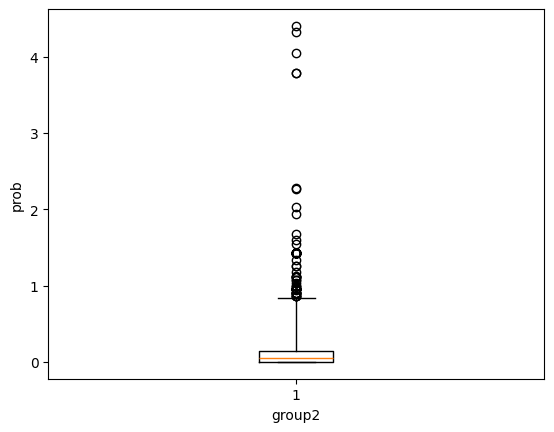

In [176]:

plt.boxplot(new_spam["group_2"],whis=5)
plt.xlabel('group2')
plt.ylabel('prob')
plt.show()


In [177]:
Q1 = np.percentile(new_spam["group_2"], 25)  # 1사분위수
Q3 = np.percentile(new_spam["group_2"], 75)  # 3사분위수
IQR = Q3 - Q1

lower_bound = Q1 - 5 * IQR
upper_bound = Q3 + 5 * IQR

outliers_2 = new_spam["group_2"][(new_spam["group_2"] < lower_bound) | (new_spam["group_2"] > upper_bound)]
print(f"이상치 개수: {len(outliers_2)}")

이상치 개수: 87


In [178]:
display(new_spam["group_2"].sort_values()[:-len(outliers_2)].describe())

count    4514.000000
mean        0.088648
std         0.124096
min         0.000000
25%         0.000000
50%         0.044000
75%         0.132000
max         0.832000
Name: group_2, dtype: float64

In [179]:
# 컬럼 명과 np.where(조건, True일 때 값, False일 때 값) -> ndarray 이용 
new_spam["group_2"] = np.where(new_spam["group_2"] >= new_spam["group_2"].sort_values()[:-len(outliers_2)].mean(), 1, 0)
new_spam

,group_1,group_2,group_3,group_4,group_5,symbols,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.257,1,0.064,0.142222,0.035556,0.129667,3.756,61,278,1
1,0.518,1,0.078,0.312222,0.070000,0.122000,5.114,101,1028,1
2,0.340,1,0.167,0.428889,0.070000,0.103833,9.821,485,2259,1
3,0.380,1,0.031,0.174444,0.068889,0.045667,3.537,40,191,1
4,0.380,1,0.031,0.174444,0.068889,0.045000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...
4596,0.312,0,0.062,0.000000,0.068889,0.038667,1.142,3,88,0
4597,0.600,1,0.000,0.222222,0.000000,0.058833,1.555,4,14,0
4598,0.360,1,0.030,0.033333,0.000000,0.136667,1.404,6,118,0
4599,0.321,0,0.000,0.071111,0.035556,0.009500,1.147,5,78,0


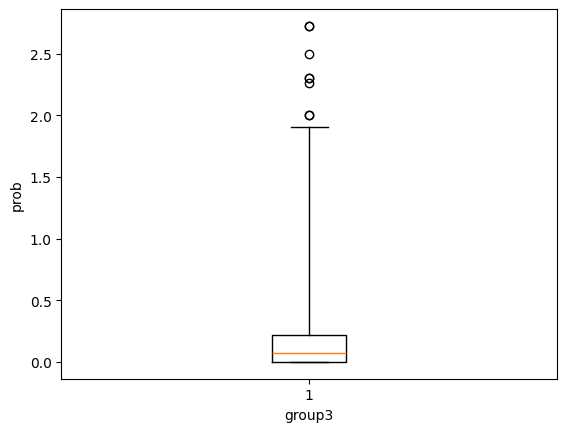

In [180]:
plt.boxplot(new_spam["group_3"], whis=8)
plt.xlabel('group3')
plt.ylabel('prob')
plt.show()


In [181]:
Q1 = np.percentile(new_spam["group_3"], 25)
Q3 = np.percentile(new_spam["group_3"], 75)
IQR = Q3 - Q1

lower_bound = Q1 - 5 * IQR
upper_bound = Q3 + 5 * IQR

outliers_3 = new_spam["group_3"][(new_spam["group_3"] < lower_bound) | (new_spam["group_3"] > upper_bound)]
print(f"이상치 개수: {len(outliers_3)}")

이상치 개수: 62


In [182]:
display(new_spam["group_3"].sort_values()[:-len(outliers_3)].describe())

count    4539.000000
mean        0.144695
std         0.202004
min         0.000000
25%         0.000000
50%         0.072000
75%         0.210000
max         1.302000
Name: group_3, dtype: float64

In [183]:
new_spam["group_3"] = np.where(new_spam["group_3"] >= new_spam["group_3"].sort_values()[:-len(outliers_3)].mean(), 1, 0)
new_spam

,group_1,group_2,group_3,group_4,group_5,symbols,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.257,1,0,0.142222,0.035556,0.129667,3.756,61,278,1
1,0.518,1,0,0.312222,0.070000,0.122000,5.114,101,1028,1
2,0.340,1,1,0.428889,0.070000,0.103833,9.821,485,2259,1
3,0.380,1,0,0.174444,0.068889,0.045667,3.537,40,191,1
4,0.380,1,0,0.174444,0.068889,0.045000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...
4596,0.312,0,0,0.000000,0.068889,0.038667,1.142,3,88,0
4597,0.600,1,0,0.222222,0.000000,0.058833,1.555,4,14,0
4598,0.360,1,0,0.033333,0.000000,0.136667,1.404,6,118,0
4599,0.321,0,0,0.071111,0.035556,0.009500,1.147,5,78,0


count    4601.000000
mean        0.177517
std         0.416560
min         0.000000
25%         0.000000
50%         0.050000
75%         0.153333
max         4.444444
Name: group_5, dtype: float64

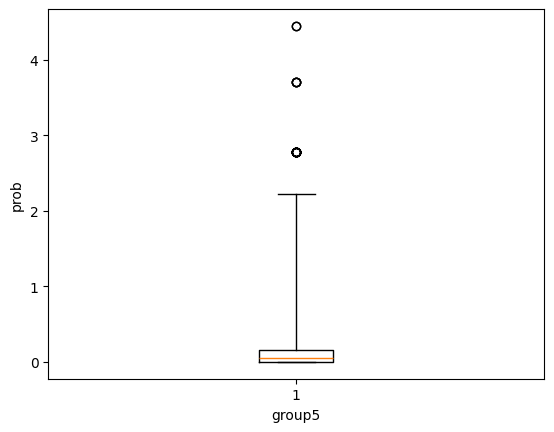

In [184]:
display(new_spam["group_5"].sort_values().describe())
plt.boxplot(new_spam["group_5"], whis=15)
plt.xlabel('group5')
plt.ylabel('prob')
plt.show()


In [185]:
Q1 = np.percentile(new_spam["group_5"], 25)
Q3 = np.percentile(new_spam["group_5"], 75)
IQR = Q3 - Q1

lower_bound = Q1 - 5 * IQR
upper_bound = Q3 + 5 * IQR

outliers_5 = new_spam["group_5"][(new_spam["group_5"] < lower_bound) | (new_spam["group_5"] > upper_bound)]
print(f"이상치 개수: {len(outliers_5)}")

이상치 개수: 210


In [186]:
display(new_spam["group_5"].sort_values()[:-len(outliers_5)].describe())

count    4391.000000
mean        0.097978
std         0.147830
min         0.000000
25%         0.000000
50%         0.043333
75%         0.136667
max         0.913333
Name: group_5, dtype: float64

In [187]:
new_spam["group_5"] = np.where(new_spam["group_5"] >= new_spam["group_5"].sort_values()[:-len(outliers_3)].mean(), 1, 0)
new_spam

,group_1,group_2,group_3,group_4,group_5,symbols,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.257,1,0,0.142222,0,0.129667,3.756,61,278,1
1,0.518,1,0,0.312222,0,0.122000,5.114,101,1028,1
2,0.340,1,1,0.428889,0,0.103833,9.821,485,2259,1
3,0.380,1,0,0.174444,0,0.045667,3.537,40,191,1
4,0.380,1,0,0.174444,0,0.045000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...
4596,0.312,0,0,0.000000,0,0.038667,1.142,3,88,0
4597,0.600,1,0,0.222222,0,0.058833,1.555,4,14,0
4598,0.360,1,0,0.033333,0,0.136667,1.404,6,118,0
4599,0.321,0,0,0.071111,0,0.009500,1.147,5,78,0
